## Part 1: Import Libraries

In [ ]:
import cvxpy as cp
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
FolderPath = '/content/drive/My Drive/MIE479 Capstone Project/Final Code'

Mounted at /content/drive


## Part 2: Load Russell 1000 Tickers

In [ ]:
dfRussell1000 = pd.read_csv(f'{FolderPath}/Stock Selection/Data/russell_1000_tickers.csv')
Russell_1000 = list(dfRussell1000.Ticker)

## Part 3: Filter the Tickers that Have Price Data Before 2016-09-01

In [ ]:
lstFilteredTickers = []
dtCutOff = datetime(2016, 9, 1)

for strTicker in Russell_1000:
  try:
    dtMinDate = yf.download(strTicker, period='max').index[0]
    if dtMinDate < dtCutOff:
      lstFilteredTickers.append(strTicker)
  except:
    continue

# 2016-09-01: ['MMM', 'ABT', 'ABBV', 'ACHC', 'ACN', 'AYI', 'ADM', 'ADBE', 'ADP', 'AAP', 'WMS', 'ACM', 'AES', 'AFL', 'AGCO', 'A', 'ADC', 'AGNC', 'AIG', 'AL', 'APD', 'AKAM', 'ALK', 'ALB', 'AA', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALSN', 'ALL', 'ALLY', 'ALNY', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMC', 'AMCR', 'AMD', 'DOX', 'AMED', 'AEE', 'AAL', 'AEP', 'AXP', 'AFG', 'AMH', 'AMT', 'AWK', 'AMP', 'AME', 'AMG', 'AMGN', 'APH', 'ADI', 'NLY', 'ANSS', 'AR', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'ATR', 'APTV', 'ARMK', 'ACGL', 'ARES', 'ANET', 'AWI', 'ARW', 'AJG', 'ASH', 'AZPN', 'AIZ', 'AGO', 'T', 'TEAM', 'ATO', 'ADSK', 'AN', 'AZO', 'AVB', 'AGR', 'AVY', 'CAR', 'AVT', 'AXTA', 'AXS', 'AXON', 'AZTA', 'BKR', 'BALL', 'BAC', 'OZK', 'BBWI', 'BAX', 'BDX', 'WRB', 'BERY', 'BBY', 'BIO', 'TECH', 'BIIB', 'BMRN', 'BLK', 'BX', 'HRB', 'SQ', 'BK', 'BA', 'BOKF', 'BKNG', 'BAH', 'BWA', 'SAM', 'BXP', 'BSX', 'BYD', 'BFAM', 'BMY', 'BRX', 'AVGO', 'BR', 'BRO', 'BRKR', 'BC', 'BLDR', 'BG', 'BURL', 'BWXT', 'CHRW', 'CABO', 'CACI', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CPRI', 'CAH', 'CSL', 'CG', 'KMX', 'CCL', 'CRI', 'CASY', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CELH', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CHE', 'CC', 'LNG', 'CVX', 'CMG', 'CHH', 'CB', 'CHD', 'CHDN', 'CIEN', 'CI', 'CINF', 'CTAS', 'CRUS', 'CSCO', 'C', 'CFG', 'CLH', 'CWEN', 'CLF', 'CLX', 'CME', 'CMS', 'CNA', 'CNHI', 'KO', 'CGNX', 'CTSH', 'COHR', 'CL', 'COLB', 'COLM', 'CMCSA', 'CMA', 'CBSH', 'ED', 'CAG', 'COP', 'STZ', 'COO', 'CPRT', 'GLW', 'CSGP', 'COST', 'CTRA', 'COTY', 'CUZ', 'CXT', 'CACC', 'CROX', 'CCI', 'CCK', 'CSX', 'CUBE', 'CMI', 'CW', 'CVS', 'DHI', 'DHR', 'DRI', 'DAR', 'DVA', 'DECK', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DKS', 'DLR', 'DFS', 'DISH', 'DIS', 'DLB', 'DG', 'DLTR', 'D', 'DPZ', 'DCI', 'DOV', 'DTE', 'DUK', 'DD', 'DXC', 'EXP', 'EWBC', 'EGP', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ESI', 'ELV', 'EME', 'EMR', 'EHC', 'ENOV', 'ENPH', 'ENTG', 'ETR', 'EOG', 'EPAM', 'EPR', 'EQT', 'EFX', 'EQIX', 'ELS', 'EQR', 'WTRG', 'ESS', 'EL', 'ETSY', 'EEFT', 'EVR', 'EG', 'EVRG', 'ES', 'EXAS', 'EXEL', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FAST', 'FRT', 'FDX', 'FERG', 'FICO', 'FNF', 'FITB', 'FAF', 'FCNCA', 'FHB', 'FHN', 'FR', 'FSLR', 'FE', 'FIS', 'FI', 'FIVE', 'FIVN', 'FLT', 'FLO', 'FLS', 'FMC', 'FNB', 'F', 'FTNT', 'FTV', 'FBIN', 'BEN', 'FCX', 'FRPT', 'CFR', 'FCN', 'GME', 'GLPI', 'GPS', 'GRMN', 'IT', 'GE', 'GEN', 'GNRC', 'GD', 'GIS', 'GM', 'G', 'GNTX', 'GPC', 'GILD', 'GPN', 'GLOB', 'GL', 'GMED', 'GDDY', 'GS', 'GGG', 'GWW', 'LOPE', 'GPK', 'GWRE', 'HAL', 'THG', 'HOG', 'HIG', 'HAS', 'HE', 'HCA', 'HR', 'PEAK', 'HEI', 'JKHY', 'HSY', 'HES', 'HPE', 'HXL', 'DINO', 'HIW', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HLI', 'HHH', 'HPQ', 'HUBB', 'HUBS', 'HUM', 'HBAN', 'HII', 'HUN', 'H', 'IAC', 'IBM', 'ICLR', 'ICUI', 'IDA', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 'INGR', 'PODD', 'IART', 'INTC', 'IBKR', 'ICE', 'IFF', 'IP', 'INTU', 'ISRG', 'IVZ', 'IONS', 'IPG', 'IPGP', 'IQV', 'IRDM', 'IRM', 'ITT', 'JBL', 'J', 'JAZZ', 'JBHT', 'JEF', 'JNJ', 'JCI', 'JLL', 'JPM', 'JNPR', 'KBR', 'K', 'KMPR', 'KDP', 'KEY', 'KEYS', 'KRC', 'KMB', 'KIM', 'KMI', 'KNSL', 'KEX', 'KKR', 'KLAC', 'KNX', 'KSS', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LAMR', 'LSTR', 'LVS', 'LSCC', 'LAZ', 'LEA', 'LEG', 'LDOS', 'LEN', 'LII', 'LBRDA', 'LBRDK', 'FWONA', 'FWONK', 'LSXMA', 'LSXMK', 'LLY', 'LECO', 'LNC', 'LIN', 'LAD', 'LFUS', 'LYV', 'LKQ', 'LMT', 'L', 'LPX', 'LOW', 'LPLA', 'LULU', 'LITE', 'LYB', 'MTB', 'M', 'MSGS', 'MANH', 'MAN', 'MRO', 'MPC', 'MKL', 'MKTX', 'MAR', 'VAC', 'MMC', 'MLM', 'MRVL', 'MAS', 'MASI', 'MTZ', 'MA', 'MTCH', 'MAT', 'MKC', 'MCD', 'MCK', 'MDU', 'MPW', 'MEDP', 'MDT', 'MRK', 'MRCY', 'META', 'MET', 'MTD', 'MTG', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MIDD', 'MRTX', 'MKSI', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MORN', 'MOS', 'MSI', 'MSA', 'MSM', 'MSCI', 'MUSA', 'NDAQ', 'NTRA', 'NFG', 'NSA', 'VYX', 'NTAP', 'NFLX', 'NBIX', 'NEWR', 'NYCB', 'NYT', 'NWL', 'NEU', 'NEM', 'NWSA', 'NWS', 'NXST', 'NEE', 'NKE', 'NI', 'NNN', 'NDSN', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NOV', 'NVCR', 'NRG', 'NUE', 'NVDA', 'NVR', 'ORLY', 'OXY', 'OGE', 'ODFL', 'ORI', 'OLN', 'OLLI', 'OHI', 'OMC', 'ON', 'OMF', 'OKE', 'ORCL', 'OSK', 'OVV', 'OC', 'PCAR', 'PKG', 'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PCTY', 'PYPL', 'PEGA', 'PENN', 'PAG', 'PNR', 'PEN', 'PEP', 'PFGC', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PPC', 'PNFP', 'PNW', 'PXD', 'PLNT', 'PLUG', 'PNC', 'PII', 'POOL', 'BPOP', 'POST', 'PPG', 'PPL', 'PINC', 'TROW', 'PRI', 'PFG', 'PG', 'PGR', 'PLD', 'PB', 'PRU', 'PTC', 'PSA', 'PEG', 'PHM', 'PSTG', 'PVH', 'QGEN', 'QRVO', 'QCOM', 'PWR', 'DGX', 'QDEL', 'RL', 'RRC', 'RJF', 'RYN', 'RTX', 'RBC', 'O', 'RRX', 'REG', 'REGN', 'RF', 'RGA', 'RS', 'RNR', 'RGEN', 'RSG', 'RMD', 'RVTY', 'REXR', 'RH', 'RNG', 'RBA', 'RITM', 'RLI', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'RGLD', 'RPM', 'R', 'SPGI', 'SAIA', 'SAIC', 'CRM', 'SLM', 'SRPT', 'SBAC', 'HSIC', 'SLB', 'SMG', 'SEB', 'SGEN', 'SEE', 'SEIC', 'SRE', 'ST', 'SCI', 'NOW', 'SHW', 'SLGN', 'SPG', 'SIRI', 'SITE', 'SKX', 'SWKS', 'AOS', 'SJM', 'SNA', 'SON', 'SO', 'SCCO', 'LUV', 'SWN', 'SPB', 'SPR', 'SRC', 'SPLK', 'SSNC', 'SSRM', 'STAG', 'SWK', 'SBUX', 'STWD', 'STT', 'STLD', 'SRCL', 'STE', 'SF', 'SYK', 'SUI', 'RUN', 'SYF', 'SNPS', 'SNV', 'SYY', 'TMUS', 'TTWO', 'TNDM', 'TPR', 'TRGP', 'TGT', 'SNX', 'FTI', 'TDOC', 'TDY', 'TFX', 'TPX', 'THC', 'TDC', 'TER', 'TSLA', 'TTEK', 'TXN', 'TPL', 'TXRH', 'TXT', 'TMO', 'TFSL', 'THO', 'TKR', 'TJX', 'TKO', 'TOL', 'BLD', 'TTC', 'TSCO', 'TT', 'TDG', 'TRU', 'TNL', 'TRV', 'TREX', 'TRMB', 'TRIP', 'TFC', 'TWLO', 'TYL', 'TSN', 'UHAL', 'X', 'UI', 'UDR', 'UGI', 'ULTA', 'RARE', 'UAA', 'UA', 'UNP', 'UAL', 'UPS', 'URI', 'UTHR', 'UNH', 'OLED', 'UHS', 'UNM', 'USB', 'USFD', 'MTN', 'VLO', 'VMI', 'VEEV', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VSAT', 'VTRS', 'VIRT', 'V', 'VMW', 'VNO', 'VOYA', 'VMC', 'WPC', 'WAB', 'WBA', 'WMT', 'WBD', 'WM', 'WAT', 'WSO', 'W', 'WBS', 'WEC', 'WFC', 'WELL', 'WEN', 'WCC', 'WST', 'WAL', 'WDC', 'WU', 'WLK', 'WRK', 'WEX', 'WY', 'WHR', 'WTM', 'WMB', 'WSM', 'WTW', 'WSC', 'WING', 'WTFC', 'WOLF', 'WWD', 'WDAY', 'WYNN', 'XEL', 'XPO', 'XYL', 'YUM', 'ZBRA', 'ZG', 'Z', 'ZBH', 'ZION', 'ZTS']

# 2020-09-01: ['TXG', 'MMM', 'ABT', 'ABBV', 'ACHC', 'ACN', 'AYI', 'ADM', 'ADBE', 'ADP', 'ADT', 'AAP', 'WMS', 'ACM', 'AES', 'AFL', 'AGCO', 'A', 'ADC', 'AGNC', 'AIG', 'AL', 'APD', 'AKAM', 'ALK', 'ALB', 'ACI', 'AA', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALSN', 'ALL', 'ALLY', 'ALNY', 'GOOGL', 'GOOG', 'AYX', 'MO', 'AMZN', 'AMC', 'AMCR', 'AMD', 'DOX', 'AMED', 'AEE', 'AAL', 'AEP', 'AXP', 'AFG', 'AMH', 'AMT', 'AWK', 'COLD', 'AMP', 'AME', 'AMG', 'AMGN', 'APH', 'ADI', 'NLY', 'ANSS', 'AM', 'AR', 'AON', 'APA', 'APLS', 'APO', 'AAPL', 'AMAT', 'ATR', 'APTV', 'ARMK', 'ACGL', 'ARES', 'ANET', 'AWI', 'ARW', 'AJG', 'ASH', 'AZPN', 'AIZ', 'AGO', 'T', 'TEAM', 'ATO', 'ADSK', 'AN', 'AZO', 'AVB', 'AGR', 'AVTR', 'AVY', 'CAR', 'AVT', 'AXTA', 'AXS', 'AXON', 'AZEK', 'AZTA', 'BKR', 'BALL', 'BAC', 'OZK', 'BBWI', 'BAX', 'BDX', 'WRB', 'BERY', 'BBY', 'BILL', 'BIO', 'TECH', 'BIIB', 'BMRN', 'BJ', 'BLK', 'BX', 'HRB', 'SQ', 'BK', 'BA', 'BOKF', 'BKNG', 'BAH', 'BWA', 'SAM', 'BXP', 'BSX', 'BYD', 'BFAM', 'BHF', 'BMY', 'BRX', 'AVGO', 'BR', 'BEPC', 'BRO', 'BRKR', 'BC', 'BLDR', 'BG', 'BURL', 'BWXT', 'CHRW', 'CABO', 'CACI', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CPRI', 'CAH', 'CSL', 'CG', 'KMX', 'CCL', 'CARR', 'CRI', 'CASY', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CELH', 'COR', 'CNC', 'CNP', 'CDAY', 'CF', 'CHPT', 'CRL', 'SCHW', 'CHTR', 'CHE', 'CC', 'LNG', 'CVX', 'CMG', 'CHH', 'CB', 'CHD', 'CHDN', 'CIEN', 'CI', 'CINF', 'CTAS', 'CRUS', 'CSCO', 'C', 'CFG', 'CLVT', 'CLH', 'CWEN', 'CLF', 'CLX', 'NET', 'CME', 'CMS', 'CNA', 'CNHI', 'KO', 'CGNX', 'CTSH', 'COHR', 'CL', 'COLB', 'COLM', 'CMCSA', 'CMA', 'CBSH', 'ED', 'CAG', 'COP', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'COTY', 'CUZ', 'CXT', 'CACC', 'CROX', 'CRWD', 'CCI', 'CCK', 'CSX', 'CUBE', 'CMI', 'CW', 'CVS', 'DHI', 'DHR', 'DRI', 'DAR', 'DDOG', 'DVA', 'DECK', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DKS', 'DLR', 'DFS', 'DISH', 'DIS', 'DOCU', 'DLB', 'DG', 'DLTR', 'D', 'DPZ', 'DCI', 'DOV', 'DOW', 'DKNG', 'DBX', 'DTE', 'DUK', 'DNB', 'DD', 'DXC', 'DT', 'EXP', 'EWBC', 'EGP', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'ELAN', 'ESTC', 'EA', 'ESI', 'ELV', 'EME', 'EMR', 'EHC', 'ENOV', 'ENPH', 'ENTG', 'ETR', 'NVST', 'EOG', 'EPAM', 'EPR', 'EQT', 'EFX', 'EQIX', 'EQH', 'ELS', 'EQR', 'WTRG', 'ESS', 'EL', 'ETSY', 'EEFT', 'EVR', 'EG', 'EVRG', 'ES', 'EXAS', 'EXEL', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FAST', 'FRT', 'FDX', 'FERG', 'FICO', 'FNF', 'FITB', 'FAF', 'FCNCA', 'FHB', 'FHN', 'FR', 'FSLR', 'FE', 'FIS', 'FI', 'FIVE', 'FIVN', 'FLT', 'FND', 'FLO', 'FLS', 'FMC', 'FNB', 'F', 'FTNT', 'FTV', 'FBIN', 'FOXA', 'FOX', 'BEN', 'FCX', 'FRPT', 'CFR', 'FCN', 'GME', 'GLPI', 'GPS', 'GRMN', 'IT', 'GTES', 'GE', 'GEN', 'GNRC', 'GD', 'GIS', 'GM', 'G', 'GNTX', 'GPC', 'GILD', 'GPN', 'GLOB', 'GL', 'GMED', 'GDDY', 'GS', 'GGG', 'GWW', 'LOPE', 'GPK', 'GO', 'GWRE', 'HAL', 'THG', 'HOG', 'HIG', 'HAS', 'HE', 'HCA', 'HR', 'PEAK', 'HEI', 'JKHY', 'HSY', 'HES', 'HPE', 'HXL', 'DINO', 'HIW', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HLI', 'HHH', 'HWM', 'HPQ', 'HUBB', 'HUBS', 'HUM', 'HBAN', 'HII', 'HUN', 'H', 'IAC', 'IBM', 'ICLR', 'ICUI', 'IDA', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 'IR', 'INGR', 'INSP', 'PODD', 'IART', 'INTC', 'IBKR', 'ICE', 'IFF', 'IP', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IONS', 'IPG', 'IPGP', 'IQV', 'IRDM', 'IRM', 'ITT', 'JBL', 'J', 'JHG', 'JAZZ', 'JBHT', 'JEF', 'JNJ', 'JCI', 'JLL', 'JPM', 'JNPR', 'KRTX', 'KBR', 'K', 'KMPR', 'KDP', 'KEY', 'KEYS', 'KRC', 'KMB', 'KIM', 'KMI', 'KNSL', 'KEX', 'KKR', 'KLAC', 'KNX', 'KSS', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LAMR', 'LW', 'LSTR', 'LVS', 'LSCC', 'LAZ', 'LEA', 'LEG', 'LDOS', 'LEN', 'LII', 'LBRDA', 'LBRDK', 'FWONA', 'FWONK', 'LSXMA', 'LSXMK', 'LLY', 'LECO', 'LNC', 'LIN', 'LAD', 'LFUS', 'LYV', 'LKQ', 'LMT', 'L', 'LPX', 'LOW', 'LPLA', 'LULU', 'LITE', 'LYFT', 'LYB', 'MTB', 'M', 'MSGS', 'MANH', 'MAN', 'MRO', 'MPC', 'MKL', 'MKTX', 'MAR', 'VAC', 'MMC', 'MLM', 'MRVL', 'MAS', 'MASI', 'MTZ', 'MA', 'MTCH', 'MAT', 'MKC', 'MCD', 'MCK', 'MDU', 'MPW', 'MEDP', 'MDT', 'MRK', 'MRCY', 'META', 'MET', 'MTD', 'MTG', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MIDD', 'MRTX', 'MKSI', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MDB', 'MPWR', 'MNST', 'MCO', 'MS', 'MORN', 'MOS', 'MSI', 'MP', 'MSA', 'MSM', 'MSCI', 'MUSA', 'NDAQ', 'NTRA', 'NFG', 'NSA', 'NCNO', 'VYX', 'NTAP', 'NFLX', 'NBIX', 'NFE', 'NEWR', 'NYCB', 'NYT', 'NWL', 'NEU', 'NEM', 'NWSA', 'NWS', 'NXST', 'NEE', 'NKE', 'NI', 'NNN', 'NDSN', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NOV', 'NVCR', 'NRG', 'NUE', 'NTNX', 'NVT', 'NVDA', 'NVR', 'ORLY', 'OXY', 'OGE', 'OKTA', 'ODFL', 'ORI', 'OLN', 'OLLI', 'OHI', 'OMC', 'ON', 'OMF', 'OKE', 'ORCL', 'OSK', 'OTIS', 'OVV', 'OC', 'PCAR', 'PKG', 'PANW', 'PARAA', 'PARA', 'PK', 'PH', 'PAYX', 'PAYC', 'PCTY', 'PYPL', 'PEGA', 'PTON', 'PENN', 'PAG', 'PNR', 'PEN', 'PEP', 'PFGC', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PPC', 'PNFP', 'PNW', 'PINS', 'PXD', 'PLNT', 'PLUG', 'PNC', 'PII', 'POOL', 'BPOP', 'POST', 'PPG', 'PPL', 'PINC', 'TROW', 'PRI', 'PFG', 'PG', 'PGR', 'PLD', 'PB', 'PRU', 'PTC', 'PSA', 'PEG', 'PHM', 'PSTG', 'PVH', 'QGEN', 'QRVO', 'QCOM', 'PWR', 'QS', 'DGX', 'QDEL', 'RCM', 'RL', 'RRC', 'RJF', 'RYN', 'RTX', 'RBC', 'O', 'RRX', 'REG', 'REGN', 'RF', 'RGA', 'RS', 'RNR', 'RGEN', 'RSG', 'RMD', 'RVTY', 'REXR', 'REYN', 'RH', 'RNG', 'RBA', 'RITM', 'RLI', 'RHI', 'RKT', 'ROK', 'ROKU', 'ROL', 'ROP', 'ROST', 'RCL', 'RGLD', 'RPRX', 'RPM', 'R', 'SPGI', 'SAIA', 'SAIC', 'CRM', 'SLM', 'SRPT', 'SBAC', 'HSIC', 'SLB', 'SNDR', 'SMG', 'SEB', 'SGEN', 'SEE', 'SEIC', 'SRE', 'ST', 'SCI', 'NOW', 'SHW', 'FOUR', 'SWAV', 'SLGN', 'SPG', 'SIRI', 'SITE', 'SKX', 'SWKS', 'SMAR', 'AOS', 'SJM', 'SNA', 'SON', 'SO', 'SCCO', 'LUV', 'SWN', 'SPB', 'SPR', 'SRC', 'SPLK', 'SPOT', 'SSNC', 'SSRM', 'STAG', 'SWK', 'SBUX', 'STWD', 'STT', 'STLD', 'SRCL', 'STE', 'SF', 'SYK', 'SUI', 'RUN', 'SYF', 'SNPS', 'SNV', 'SYY', 'TMUS', 'TTWO', 'TNDM', 'TPR', 'TRGP', 'TGT', 'SNX', 'FTI', 'TDOC', 'TDY', 'TFX', 'TPX', 'THC', 'TDC', 'TER', 'TSLA', 'TTEK', 'TXN', 'TPL', 'TXRH', 'TXT', 'TMO', 'TFSL', 'THO', 'TKR', 'TJX', 'TKO', 'TOL', 'BLD', 'TTC', 'TSCO', 'TTD', 'TW', 'TT', 'TDG', 'TRU', 'TNL', 'TRV', 'TREX', 'TRMB', 'TRIP', 'TFC', 'TWLO', 'TYL', 'TSN', 'UHAL', 'X', 'UBER', 'UI', 'UDR', 'UGI', 'ULTA', 'RARE', 'UAA', 'UA', 'UNP', 'UAL', 'UPS', 'URI', 'UTHR', 'UWMC', 'UNH', 'OLED', 'UHS', 'UNM', 'USB', 'USFD', 'MTN', 'VLO', 'VMI', 'VVV', 'VEEV', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VRT', 'VFC', 'VSAT', 'VTRS', 'VICI', 'VIRT', 'V', 'VST', 'VMW', 'VNO', 'VOYA', 'VMC', 'WPC', 'WAB', 'WBA', 'WMT', 'WBD', 'WM', 'WAT', 'WSO', 'W', 'WBS', 'WEC', 'WFC', 'WELL', 'WEN', 'WCC', 'WST', 'WAL', 'WDC', 'WU', 'WLK', 'WRK', 'WEX', 'WY', 'WHR', 'WTM', 'WMB', 'WSM', 'WTW', 'WSC', 'WING', 'WTFC', 'WOLF', 'WWD', 'WDAY', 'WH', 'WYNN', 'XEL', 'XP', 'XPO', 'XYL', 'YETI', 'YUM', 'ZBRA', 'ZG', 'Z', 'ZBH', 'ZION', 'ZTS', 'ZM', 'ZI', 'ZS']

In [ ]:
print(lstFilteredTickers)

['MMM', 'ABT', 'ABBV', 'ACHC', 'ACN', 'AYI', 'ADM', 'ADBE', 'ADP', 'AAP', 'WMS', 'ACM', 'AES', 'AFL', 'AGCO', 'A', 'ADC', 'AGNC', 'AIG', 'AL', 'APD', 'AKAM', 'ALK', 'ALB', 'AA', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALSN', 'ALL', 'ALLY', 'ALNY', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMC', 'AMCR', 'AMD', 'DOX', 'AMED', 'AEE', 'AAL', 'AEP', 'AXP', 'AFG', 'AMH', 'AMT', 'AWK', 'AMP', 'AME', 'AMG', 'AMGN', 'APH', 'ADI', 'NLY', 'ANSS', 'AR', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'ATR', 'APTV', 'ARMK', 'ACGL', 'ARES', 'ANET', 'AWI', 'ARW', 'AJG', 'ASH', 'AZPN', 'AIZ', 'AGO', 'T', 'TEAM', 'ATO', 'ADSK', 'AN', 'AZO', 'AVB', 'AGR', 'AVY', 'CAR', 'AVT', 'AXTA', 'AXS', 'AXON', 'AZTA', 'BKR', 'BALL', 'BAC', 'OZK', 'BBWI', 'BAX', 'BDX', 'WRB', 'BERY', 'BBY', 'BIO', 'TECH', 'BIIB', 'BMRN', 'BLK', 'BX', 'HRB', 'SQ', 'BK', 'BA', 'BOKF', 'BKNG', 'BAH', 'BWA', 'SAM', 'BXP', 'BSX', 'BYD', 'BFAM', 'BMY', 'BRX', 'AVGO', 'BR', 'BRO', 'BRKR', 'BC', 'BLDR', 'BG', 'BURL', 'BWXT', 'CHRW', 'CABO', 'CACI', 'CDNS', 'CZR', 'CPT',

## Part 4: Grab Daily Return Data for Each Ticker

In [ ]:
dfStockPrice = pd.DataFrame()
strStartDate, strEndDate = '2016-08-31', '2021-08-31'
# 2016-09-01
lstTickers = ['MMM', 'ABT', 'ABBV', 'ACHC', 'ACN', 'AYI', 'ADM', 'ADBE', 'ADP', 'AAP', 'WMS', 'ACM', 'AES', 'AFL', 'AGCO', 'A', 'ADC', 'AGNC', 'AIG', 'AL', 'APD', 'AKAM', 'ALK', 'ALB', 'AA', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALSN', 'ALL', 'ALLY', 'ALNY', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMC', 'AMCR', 'AMD', 'DOX', 'AMED', 'AEE', 'AAL', 'AEP', 'AXP', 'AFG', 'AMH', 'AMT', 'AWK', 'AMP', 'AME', 'AMG', 'AMGN', 'APH', 'ADI', 'NLY', 'ANSS', 'AR', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'ATR', 'APTV', 'ARMK', 'ACGL', 'ARES', 'ANET', 'AWI', 'ARW', 'AJG', 'ASH', 'AZPN', 'AIZ', 'AGO', 'T', 'TEAM', 'ATO', 'ADSK', 'AN', 'AZO', 'AVB', 'AGR', 'AVY', 'CAR', 'AVT', 'AXTA', 'AXS', 'AXON', 'AZTA', 'BKR', 'BALL', 'BAC', 'OZK', 'BBWI', 'BAX', 'BDX', 'WRB', 'BERY', 'BBY', 'BIO', 'TECH', 'BIIB', 'BMRN', 'BLK', 'BX', 'HRB', 'SQ', 'BK', 'BA', 'BOKF', 'BKNG', 'BAH', 'BWA', 'SAM', 'BXP', 'BSX', 'BYD', 'BFAM', 'BMY', 'BRX', 'AVGO', 'BR', 'BRO', 'BRKR', 'BC', 'BLDR', 'BG', 'BURL', 'BWXT', 'CHRW', 'CABO', 'CACI', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CPRI', 'CAH', 'CSL', 'CG', 'KMX', 'CCL', 'CRI', 'CASY', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CELH', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CHE', 'CC', 'LNG', 'CVX', 'CMG', 'CHH', 'CB', 'CHD', 'CHDN', 'CIEN', 'CI', 'CINF', 'CTAS', 'CRUS', 'CSCO', 'C', 'CFG', 'CLH', 'CWEN', 'CLF', 'CLX', 'CME', 'CMS', 'CNA', 'CNHI', 'KO', 'CGNX', 'CTSH', 'COHR', 'CL', 'COLB', 'COLM', 'CMCSA', 'CMA', 'CBSH', 'ED', 'CAG', 'COP', 'STZ', 'COO', 'CPRT', 'GLW', 'CSGP', 'COST', 'CTRA', 'COTY', 'CUZ', 'CXT', 'CACC', 'CROX', 'CCI', 'CCK', 'CSX', 'CUBE', 'CMI', 'CW', 'CVS', 'DHI', 'DHR', 'DRI', 'DAR', 'DVA', 'DECK', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DKS', 'DLR', 'DFS', 'DISH', 'DIS', 'DLB', 'DG', 'DLTR', 'D', 'DPZ', 'DCI', 'DOV', 'DTE', 'DUK', 'DD', 'DXC', 'EXP', 'EWBC', 'EGP', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ESI', 'ELV', 'EME', 'EMR', 'EHC', 'ENOV', 'ENPH', 'ENTG', 'ETR', 'EOG', 'EPAM', 'EPR', 'EQT', 'EFX', 'EQIX', 'ELS', 'EQR', 'WTRG', 'ESS', 'EL', 'ETSY', 'EEFT', 'EVR', 'EG', 'EVRG', 'ES', 'EXAS', 'EXEL', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FAST', 'FRT', 'FDX', 'FERG', 'FICO', 'FNF', 'FITB', 'FAF', 'FCNCA', 'FHB', 'FHN', 'FR', 'FSLR', 'FE', 'FIS', 'FI', 'FIVE', 'FIVN', 'FLT', 'FLO', 'FLS', 'FMC', 'FNB', 'F', 'FTNT', 'FTV', 'FBIN', 'BEN', 'FCX', 'FRPT', 'CFR', 'FCN', 'GME', 'GLPI', 'GPS', 'GRMN', 'IT', 'GE', 'GEN', 'GNRC', 'GD', 'GIS', 'GM', 'G', 'GNTX', 'GPC', 'GILD', 'GPN', 'GLOB', 'GL', 'GMED', 'GDDY', 'GS', 'GGG', 'GWW', 'LOPE', 'GPK', 'GWRE', 'HAL', 'THG', 'HOG', 'HIG', 'HAS', 'HE', 'HCA', 'HR', 'PEAK', 'HEI', 'JKHY', 'HSY', 'HES', 'HPE', 'HXL', 'DINO', 'HIW', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HLI', 'HHH', 'HPQ', 'HUBB', 'HUBS', 'HUM', 'HBAN', 'HII', 'HUN', 'H', 'IAC', 'IBM', 'ICLR', 'ICUI', 'IDA', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 'INGR', 'PODD', 'IART', 'INTC', 'IBKR', 'ICE', 'IFF', 'IP', 'INTU', 'ISRG', 'IVZ', 'IONS', 'IPG', 'IPGP', 'IQV', 'IRDM', 'IRM', 'ITT', 'JBL', 'J', 'JAZZ', 'JBHT', 'JEF', 'JNJ', 'JCI', 'JLL', 'JPM', 'JNPR', 'KBR', 'K', 'KMPR', 'KDP', 'KEY', 'KEYS', 'KRC', 'KMB', 'KIM', 'KMI', 'KNSL', 'KEX', 'KKR', 'KLAC', 'KNX', 'KSS', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LAMR', 'LSTR', 'LVS', 'LSCC', 'LAZ', 'LEA', 'LEG', 'LDOS', 'LEN', 'LII', 'LBRDA', 'LBRDK', 'FWONA', 'FWONK', 'LSXMA', 'LSXMK', 'LLY', 'LECO', 'LNC', 'LIN', 'LAD', 'LFUS', 'LYV', 'LKQ', 'LMT', 'L', 'LPX', 'LOW', 'LPLA', 'LULU', 'LITE', 'LYB', 'MTB', 'M', 'MSGS', 'MANH', 'MAN', 'MRO', 'MPC', 'MKL', 'MKTX', 'MAR', 'VAC', 'MMC', 'MLM', 'MRVL', 'MAS', 'MASI', 'MTZ', 'MA', 'MTCH', 'MAT', 'MKC', 'MCD', 'MCK', 'MDU', 'MPW', 'MEDP', 'MDT', 'MRK', 'MRCY', 'META', 'MET', 'MTD', 'MTG', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MIDD', 'MRTX', 'MKSI', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MORN', 'MOS', 'MSI', 'MSA', 'MSM', 'MSCI', 'MUSA', 'NDAQ', 'NTRA', 'NFG', 'NSA', 'VYX', 'NTAP', 'NFLX', 'NBIX', 'NEWR', 'NYCB', 'NYT', 'NWL', 'NEU', 'NEM', 'NWSA', 'NWS', 'NXST', 'NEE', 'NKE', 'NI', 'NNN', 'NDSN', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NOV', 'NVCR', 'NRG', 'NUE', 'NVDA', 'NVR', 'ORLY', 'OXY', 'OGE', 'ODFL', 'ORI', 'OLN', 'OLLI', 'OHI', 'OMC', 'ON', 'OMF', 'OKE', 'ORCL', 'OSK', 'OVV', 'OC', 'PCAR', 'PKG', 'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PCTY', 'PYPL', 'PEGA', 'PENN', 'PAG', 'PNR', 'PEN', 'PEP', 'PFGC', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PPC', 'PNFP', 'PNW', 'PXD', 'PLNT', 'PLUG', 'PNC', 'PII', 'POOL', 'BPOP', 'POST', 'PPG', 'PPL', 'PINC', 'TROW', 'PRI', 'PFG', 'PG', 'PGR', 'PLD', 'PB', 'PRU', 'PTC', 'PSA', 'PEG', 'PHM', 'PSTG', 'PVH', 'QGEN', 'QRVO', 'QCOM', 'PWR', 'DGX', 'QDEL', 'RL', 'RRC', 'RJF', 'RYN', 'RTX', 'RBC', 'O', 'RRX', 'REG', 'REGN', 'RF', 'RGA', 'RS', 'RNR', 'RGEN', 'RSG', 'RMD', 'RVTY', 'REXR', 'RH', 'RNG', 'RBA', 'RITM', 'RLI', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'RGLD', 'RPM', 'R', 'SPGI', 'SAIA', 'SAIC', 'CRM', 'SLM', 'SRPT', 'SBAC', 'HSIC', 'SLB', 'SMG', 'SEB', 'SGEN', 'SEE', 'SEIC', 'SRE', 'ST', 'SCI', 'NOW', 'SHW', 'SLGN', 'SPG', 'SIRI', 'SITE', 'SKX', 'SWKS', 'AOS', 'SJM', 'SNA', 'SON', 'SO', 'SCCO', 'LUV', 'SWN', 'SPB', 'SPR', 'SRC', 'SPLK', 'SSNC', 'SSRM', 'STAG', 'SWK', 'SBUX', 'STWD', 'STT', 'STLD', 'SRCL', 'STE', 'SF', 'SYK', 'SUI', 'RUN', 'SYF', 'SNPS', 'SNV', 'SYY', 'TMUS', 'TTWO', 'TNDM', 'TPR', 'TRGP', 'TGT', 'SNX', 'FTI', 'TDOC', 'TDY', 'TFX', 'TPX', 'THC', 'TDC', 'TER', 'TSLA', 'TTEK', 'TXN', 'TPL', 'TXRH', 'TXT', 'TMO', 'TFSL', 'THO', 'TKR', 'TJX', 'TKO', 'TOL', 'BLD', 'TTC', 'TSCO', 'TT', 'TDG', 'TRU', 'TNL', 'TRV', 'TREX', 'TRMB', 'TRIP', 'TFC', 'TWLO', 'TYL', 'TSN', 'UHAL', 'X', 'UI', 'UDR', 'UGI', 'ULTA', 'RARE', 'UAA', 'UA', 'UNP', 'UAL', 'UPS', 'URI', 'UTHR', 'UNH', 'OLED', 'UHS', 'UNM', 'USB', 'USFD', 'MTN', 'VLO', 'VMI', 'VEEV', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VSAT', 'VTRS', 'VIRT', 'V', 'VMW', 'VNO', 'VOYA', 'VMC', 'WPC', 'WAB', 'WBA', 'WMT', 'WBD', 'WM', 'WAT', 'WSO', 'W', 'WBS', 'WEC', 'WFC', 'WELL', 'WEN', 'WCC', 'WST', 'WAL', 'WDC', 'WU', 'WLK', 'WRK', 'WEX', 'WY', 'WHR', 'WTM', 'WMB', 'WSM', 'WTW', 'WSC', 'WING', 'WTFC', 'WOLF', 'WWD', 'WDAY', 'WYNN', 'XEL', 'XPO', 'XYL', 'YUM', 'ZBRA', 'ZG', 'Z', 'ZBH', 'ZION', 'ZTS']
print(len(lstTickers))
lstNoPriceTicker = []

for strTicker in lstTickers:
  dfTickerPrice = yf.download(strTicker, start=strStartDate, end=strEndDate)['Adj Close']
  if len(dfTickerPrice) == 0:
    lstNoPriceTicker.append(strTicker)
  else:
    dfStockPrice[strTicker] = dfTickerPrice

dfDailyResturns = dfStockPrice.pct_change()
dfStockCorr = dfDailyResturns.corr() # find the asset correlation matrix
#dfStockCorr.to_csv('f'{FolderPath}/Stock Selection/Data/Clustering/russell_1000_corr_matrix.csv', index=False)

'''
No price data for the following tickers
['PHIN', 'KLG', 'CR', 'TOST', 'NATL', 'HCP', 'KVUE', 'CEG', 'GEHC', 'FTRE',
  'CAVA', 'ESAB', 'INFA', 'LLYVA', 'LLYVK', 'RIVN', 'GFS', 'VLTO', 'NU', 'TPG',
  'OLPX', 'KD', 'VSTS', 'GTLB']
'''

In [ ]:
# Index return for Russell 1000
dfStockPrice = pd.DataFrame()
strStartDate, strEndDate = '2023-03-01', '2023-09-01'
strTicker = '^RUI'
dfTickerPrice = yf.download(strTicker, start=strStartDate, end=strEndDate, interval='1mo')['Adj Close']
dfTickerPrice


[*********************100%%**********************]  1 of 1 completed


Date
2023-05-01    2285.649902
2023-06-01    2436.929932
2023-07-01    2518.419922
2023-08-01    2470.020020
Name: Adj Close, dtype: float64

## Part 5: Solve Correlation-Based Clustering Using Integer Programming  and Save Results

In [ ]:
# correlation matrix of n assets
dfStockCorr = pd.read_csv(f'{FolderPath}/Stock Selection/Data/Clustering/russell_1000_corr_matrix.csv')
rho_matrix = dfStockCorr.to_numpy()

# initialize number of assets to include k (k < n)
n = len(rho_matrix)
k = 15

# define binary variables zi,j and yj
z_matrix = cp.Variable((n, n), boolean=True) # z_matrix - represents the relationship between stocks
y_vector = cp.Variable(n, boolean=True) # y_vector - record the selected stocks

# define constraints
constr1 = (cp.sum(y_vector) == k) # clustering size
constr2 = (cp.sum(z_matrix, axis=1) == np.ones(n)) # each asset has only 1 representative
constr3 = (cp.max(z_matrix, axis=0) <= y_vector) # asset must be in the portfolio to be a representative

# set up problem
obj = cp.sum(cp.multiply(rho_matrix, z_matrix)) # objective function
prob = cp.Problem(cp.Maximize(obj), [constr1, constr2, constr3])
prob.solve(solver=cp.GLPK_MI)

In [ ]:
# save results
df_z = pd.DataFrame(z_matrix.value)
df_z.to_csv(f'{FolderPath}/Stock Selection/Data/Clustering/z_matrix_{k}.csv')

df_y = pd.DataFrame(y_vector.value)
df_y.to_csv(f'{FolderPath}/Stock Selection/Data/Clustering/y_vector_{k}.csv')

## Part 6: Extract Representatives for Each Cluster

In [ ]:
# obtain stored data
k = 50
y_vector = pd.read_csv(f'{FolderPath}/Stock Selection/Data/Clustering/y_vector_{k}.csv').to_numpy()[:, 1]
z_matrix = pd.read_csv(f'{FolderPath}/Stock Selection/Data/Clustering/z_matrix_{k}.csv').to_numpy()[:, 1:]
dfStockCorr = pd.read_csv(f'{FolderPath}/Stock Selection/Data/Clustering/russell_1000_corr_matrix.csv')

lstSelectedStocks = []
lstTickers = list(dfStockCorr.columns)
for index in np.nonzero(y_vector)[0]:
  lstSelectedStocks.append(lstTickers[index])
print(f'Selected Stocks: {lstSelectedStocks}')

# Selected Stocks (1 yr): ['ADBE', 'ADT', 'A', 'AKAM', 'ALGN', 'LNT', 'GOOGL', 'AYX', 'MO', 'AMED', 'AMT', 'AWK', 'AMGN', 'APH', 'NLY', 'APLS', 'ARW', 'AZPN', 'T', 'BALL', 'BBWI', 'BAX', 'BDX', 'BIIB', 'HRB', 'SAM', 'BMY', 'BC', 'CACI', 'CTLT', 'CBOE', 'CBRE', 'CELH', 'CHPT', 'CIEN', 'CLVT', 'COLM', 'COP', 'COST', 'COTY', 'CACC', 'CRWD', 'CW', 'DVA', 'DECK', 'DAL', 'XRAY', 'DFS', 'DLTR', 'DPZ', 'DBX', 'DNB', 'EMN', 'ETN', 'EBAY', 'ELAN', 'ENPH', 'EFX', 'ETSY', 'EXAS', 'EXEL', 'EXPD', 'EXR', 'FDX', 'FERG', 'FAF', 'FR', 'FE', 'FNB', 'FBIN', 'FOXA', 'FCX', 'FCN', 'GME', 'GEN', 'GIS', 'LOPE', 'GO', 'THG', 'HOG', 'HPE', 'HD', 'HLI', 'H', 'ICLR', 'ICUI', 'ITW', 'ILMN', 'INCY', 'IONS', 'IRDM', 'ITT', 'JAZZ', 'JBHT', 'KRTX', 'KIM', 'KKR', 'KSS', 'KR', 'LH', 'LRCX', 'LEA', 'LBRDK', 'FWONK', 'LSXMK', 'LYFT', 'MMC', 'MLM', 'MA', 'MAT', 'MCD', 'MCK', 'MEDP', 'MRCY', 'MCHP', 'MRTX', 'MRNA', 'MDB', 'MCO', 'MORN', 'MP', 'MUSA', 'NBIX', 'NFE', 'NYT', 'NEM', 'NWS', 'NSC', 'NOC', 'NVCR', 'NRG', 'ORLY', 'OGE', 'OLLI', 'OKE', 'ORCL', 'PCAR', 'PARA', 'PAYX', 'PCTY', 'PENN', 'PAG', 'PEN', 'PEP', 'PRGO', 'PFE', 'PCG', 'PINC', 'PGR', 'PRU', 'PHM', 'PVH', 'QRVO', 'QS', 'QDEL', 'RCM', 'RRC', 'RJF', 'RSG', 'REYN', 'RH', 'RBA', 'RKT', 'ROST', 'RPRX', 'SRPT', 'SEB', 'SGEN', 'SEE', 'SWAV', 'STLD', 'SYK', 'TNDM', 'TDC', 'TMO', 'TKO', 'TREX', 'TSN', 'UI', 'UDR', 'UAA', 'UTHR', 'UWMC', 'UNH', 'UHS', 'VLO', 'VRSK', 'VRTX', 'VRT', 'VTRS', 'VICI', 'VIRT', 'VST', 'VMW', 'WEN', 'WY', 'WTM', 'WSM', 'XP', 'ZG']
# Selected Stocks (5 yr: 200; 659.4353108479822; 20min): ['ABBV', 'ADM', 'A', 'AKAM', 'LNT', 'ALNY', 'GOOGL', 'MO', 'AMC', 'AMD', 'AMED', 'AMT', 'AME', 'ADI', 'NLY', 'AMAT', 'ANET', 'ARW', 'AJG', 'T', 'AZO', 'AXON', 'BAC', 'WRB', 'BIIB', 'BMRN', 'HRB', 'SAM', 'BYD', 'BMY', 'BC', 'BWXT', 'CASY', 'CBRE', 'CELH', 'CRL', 'CMG', 'CIEN', 'CWEN', 'CLX', 'CAG', 'COST', 'COTY', 'CROX', 'CCK', 'CUBE', 'CVS', 'DRI', 'DVA', 'DAL', 'XRAY', 'DVN', 'DXCM', 'DKS', 'DFS', 'DG', 'DPZ', 'DTE', 'EMN', 'EBAY', 'EA', 'ENPH', 'EFX', 'ETSY', 'EXAS', 'EXEL', 'EXPE', 'FAST', 'FRT', 'FDX', 'FERG', 'FNF', 'FR', 'FSLR', 'FBIN', 'FCX', 'FRPT', 'FCN', 'GEN', 'GIS', 'GILD', 'GMED', 'LOPE', 'HD', 'HLI', 'IAC', 'ICUI', 'INCY', 'ICE', 'IP', 'IONS', 'IPG', 'IRDM', 'JAZZ', 'KDP', 'KEY', 'KNSL', 'KKR', 'KSS', 'KHC', 'KR', 'LH', 'LSTR', 'LEA', 'LDOS', 'LBRDK', 'FWONA', 'LSXMK', 'LMT', 'LULU', 'MAR', 'MLM', 'MASI', 'MAT', 'MCK', 'MRK', 'MRCY', 'MSFT', 'MRTX', 'MCO', 'MORN', 'MUSA', 'NTRA', 'NBIX', 'NYT', 'NWL', 'NEU', 'NEM', 'NWSA', 'NSC', 'NVCR', 'NRG', 'NUE', 'OLLI', 'OKE', 'PANW', 'PARA', 'PH', 'PAYX', 'PCTY', 'PAG', 'PEN', 'PEP', 'PRGO', 'PCG', 'PLUG', 'POST', 'PINC', 'PRU', 'PHM', 'PVH', 'QGEN', 'QDEL', 'RRC', 'O', 'REGN', 'RGEN', 'RH', 'RBA', 'ROL', 'ROST', 'RCL', 'SRPT', 'SLB', 'SEB', 'SGEN', 'NOW', 'SKX', 'SPR', 'SYK', 'RUN', 'SNPS', 'TNDM', 'TDOC', 'TDC', 'TSLA', 'TMO', 'TKO', 'TSN', 'UI', 'UDR', 'RARE', 'UAA', 'UTHR', 'UNH', 'UHS', 'USFD', 'MTN', 'VLO', 'VTRS', 'VIRT', 'V', 'WM', 'WSO', 'WELL', 'WY', 'WTM', 'WING', 'WYNN', 'ZG']
# Selected Stocks (5 yr: 50; 569.5929065035242; 1hr5min): ['LNT', 'AMC', 'AMT', 'AME', 'AMGN', 'NLY', 'AMAT', 'ARW', 'AJG', 'WRB', 'CRL', 'DAL', 'DFS', 'DTE', 'EMN', 'FERG', 'FR', 'FBIN', 'GIS', 'HD', 'H', 'KEY', 'LSTR', 'LBRDK', 'LSXMA', 'LMT', 'MCK', 'MSFT', 'MCO', 'NEM', 'NNN', 'NUE', 'ORLY', 'PH', 'PEP', 'PRU', 'PHM', 'PVH', 'RRC', 'SLB', 'NOW', 'TMO', 'UDR', 'RARE', 'UAA', 'UNH', 'UHS', 'VIRT', 'V', 'ZG']


dictClusters = {} # record the k representatives alongside their constituents
for index in np.nonzero(y_vector)[0]:
  strTicker = lstTickers[index]
  lstTemp = []
  for indexMember in range(len(z_matrix[:, index])):
    if z_matrix[:, index][indexMember] == 1.0:
      if lstTickers[indexMember] != strTicker:
        lstTemp.append(lstTickers[indexMember])
    dictClusters[strTicker] = lstTemp

dictClusters




## Part 7: Trim the 200 Tickers Down to 15 (run when solving the original program is taking too long)

In [ ]:
'''
Note:
(1) For k = 200, the integer programming problem was solved in around 20 minutes
(2) For k = 50, the integer programming problem was solved in around 1 hour
(3) For k = 15, the integer programming was still running after round 3 hours
Alternative Approach:
Use the 200 tickers as a starting point, trim them down to 15 tickers
'''

In [ ]:
# load data
k = 200
y_vector = pd.read_csv(f'{FolderPath}/Stock Selection/Data/Clustering/y_vector_{k}.csv').to_numpy()[:, 1]
z_matrix = pd.read_csv(f'{FolderPath}/Stock Selection/Data/Clustering/z_matrix_{k}.csv').to_numpy()[:, 1:]
dfStockCorr = pd.read_csv(f'{FolderPath}/Stock Selection/Data/Clustering/russell_1000_corr_matrix.csv')
dfStockCorr.index = dfStockCorr.columns

lstSelectedStocks = []
lstTickers = list(dfStockCorr.columns)
for index in np.nonzero(y_vector)[0]:
  lstSelectedStocks.append(lstTickers[index])
print(f'Selected Stocks: {lstSelectedStocks}')

# trim dfStockCorr
dfStockCorr_Trimmed = dfStockCorr.drop([row for row in dfStockCorr.index if row not in lstSelectedStocks], axis=0)
dfStockCorr_Trimmed.drop([col for col in dfStockCorr.columns if col not in lstSelectedStocks], axis=1, inplace=True)

Selected Stocks: ['ABBV', 'ADM', 'A', 'AKAM', 'LNT', 'ALNY', 'GOOGL', 'MO', 'AMC', 'AMD', 'AMED', 'AMT', 'AME', 'ADI', 'NLY', 'AMAT', 'ANET', 'ARW', 'AJG', 'T', 'AZO', 'AXON', 'BAC', 'WRB', 'BIIB', 'BMRN', 'HRB', 'SAM', 'BYD', 'BMY', 'BC', 'BWXT', 'CASY', 'CBRE', 'CELH', 'CRL', 'CMG', 'CIEN', 'CWEN', 'CLX', 'CAG', 'COST', 'COTY', 'CROX', 'CCK', 'CUBE', 'CVS', 'DRI', 'DVA', 'DAL', 'XRAY', 'DVN', 'DXCM', 'DKS', 'DFS', 'DG', 'DPZ', 'DTE', 'EMN', 'EBAY', 'EA', 'ENPH', 'EFX', 'ETSY', 'EXAS', 'EXEL', 'EXPE', 'FAST', 'FRT', 'FDX', 'FERG', 'FNF', 'FR', 'FSLR', 'FBIN', 'FCX', 'FRPT', 'FCN', 'GEN', 'GIS', 'GILD', 'GMED', 'LOPE', 'HD', 'HLI', 'IAC', 'ICUI', 'INCY', 'ICE', 'IP', 'IONS', 'IPG', 'IRDM', 'JAZZ', 'KDP', 'KEY', 'KNSL', 'KKR', 'KSS', 'KHC', 'KR', 'LH', 'LSTR', 'LEA', 'LDOS', 'LBRDK', 'FWONA', 'LSXMK', 'LMT', 'LULU', 'MAR', 'MLM', 'MASI', 'MAT', 'MCK', 'MRK', 'MRCY', 'MSFT', 'MRTX', 'MCO', 'MORN', 'MUSA', 'NTRA', 'NBIX', 'NYT', 'NWL', 'NEU', 'NEM', 'NWSA', 'NSC', 'NVCR', 'NRG', 'NUE', 'O

In [ ]:
# solve the integer programming problem
rho_matrix = dfStockCorr_Trimmed.to_numpy()

# initialize number of assets to include k (k < n)
n = len(rho_matrix)
k = 15

# define binary variables zi,j and yj
z_matrix = cp.Variable((n, n), boolean=True)
y_vector = cp.Variable(n, boolean=True)

# define constraints
constr1 = (cp.sum(y_vector) == k)
constr2 = (cp.sum(z_matrix, axis=1) == np.ones(n))
constr3 = (cp.max(z_matrix, axis=0) <= y_vector)

# set up problem
obj = cp.sum(cp.multiply(rho_matrix, z_matrix))
prob = cp.Problem(cp.Maximize(obj), [constr1, constr2, constr3])
prob.solve(solver=cp.GLPK_MI)

110.61547954476923

In [ ]:

# save results
df_z = pd.DataFrame(z_matrix.value)
df_z.to_csv(f'{FolderPath}/Stock Selection/Data/Clustering/z_matrix_{k}.csv')

df_y = pd.DataFrame(y_vector.value)
df_y.to_csv(f'{FolderPath}/Stock Selection/Data/Clustering/y_vector_{k}.csv')


In [ ]:
# obtain stored data
#y_vector = pd.read_csv(f'{FolderPath}/Stock Selection/Data/Clustering/y_vector_50.csv').to_numpy()[:, 1]
#z_matrix = pd.read_csv(f'{FolderPath}/Stock Selection/Data/Clustering/z_matrix_50.csv').to_numpy()[:, 1:]

lstSelectedStocks = []
lstTickers = list(dfStockCorr_Trimmed.columns)
for index in np.nonzero(y_vector.value)[0]:
  lstSelectedStocks.append(lstTickers[index])
print(f'Selected Stocks: {lstSelectedStocks}')

# Selected Stocks (50): ['CRWD', 'PRU', 'ITT', 'GO', 'EXAS', 'HOOD', 'FE', 'FBIN', 'TMO', 'BIIB', 'PYCR', 'WOOF', 'PCOR', 'PARA', 'FERG', 'PEN', 'WEN', 'EXPD', 'SHC', 'SEB', 'FR', 'CFLT', 'GME', 'PCG', 'LOPE', 'LCID', 'MCHP', 'SYK', 'AFRM', 'TKO', 'DNA', 'SRPT', 'INCY', 'OGE', 'MRCY', 'CCCS', 'RPRX', 'RSG', 'DRVN', 'CNXC', 'CHPT', 'ROIV', 'GIS', 'OLLI', 'UWMC', 'CIEN', 'ADBE', 'VSCO', 'OGN', 'WSM']

dictClusters = {}
for index in np.nonzero(y_vector.value)[0]:
  strTicker = lstTickers[index]
  lstTemp = []
  for indexMember in range(len(z_matrix.value[:, index])):
    if z_matrix.value[:, index][indexMember] == 1.0:
      if lstTickers[indexMember] != strTicker:
        lstTemp.append(lstTickers[indexMember])
    dictClusters[strTicker] = lstTemp

dictClusters

## Part 8: Create Pie Chart for Sector Decomposition

In [9]:
#lstSelectedStocks = ['AAPL', 'GOOG', 'GOOGL', 'AMZN', 'JNJ', 'V', 'VZ', 'HD', 'MSFT', 'JPM', 'PG', 'UNH', 'T', 'MA', 'INTC']  #GPT
#lstSelectedStocks = ['TRGP', 'AMC', 'EXAS', 'OXY', 'LYV', 'JLL', 'FTI', 'OKE', 'SON', 'RRC', 'DVN', 'COTY', 'AR', 'EQT', 'NOV']  #SVM
lstSelectedStocks = ['AMC', 'AME', 'CRL', 'DVN', 'DFS', 'DTE', 'FERG', 'GIS', 'HD', 'MSFT', 'PRU', 'RUN', 'TMO', 'RARE', 'VIRT']  #Clustering

# obtain the GICS sector for each ticker
dfSector = pd.read_csv(f'{FolderPath}/Stock Selection/Data/SVM/ticker_sector.csv').rename(columns={'Unnamed: 0': 'Ticker'}).set_index('Ticker')

dictSector = {}
dictTickers = {}
for strTicker in lstSelectedStocks:
  try:
    strSector = dfSector.loc[strTicker].Sector
    if strSector in dictSector:
      dictSector[strSector] += 1
      dictTickers[strSector].append(strTicker)
    else:
      dictSector[strSector] = 1
      dictTickers[strSector] = [strTicker]
  except:
    print(f'Unknown Ticker: {strTicker}')

# Manually Add in FERG
if 'FERG' in lstSelectedStocks:
  if 'Industrials' in dictSector:
    dictSector['Industrials'] += 1
  else:
    dictSector['Industrials'] = 1

Unknown Ticker: FERG


In [ ]:
dictTickers

In [ ]:
dictSector

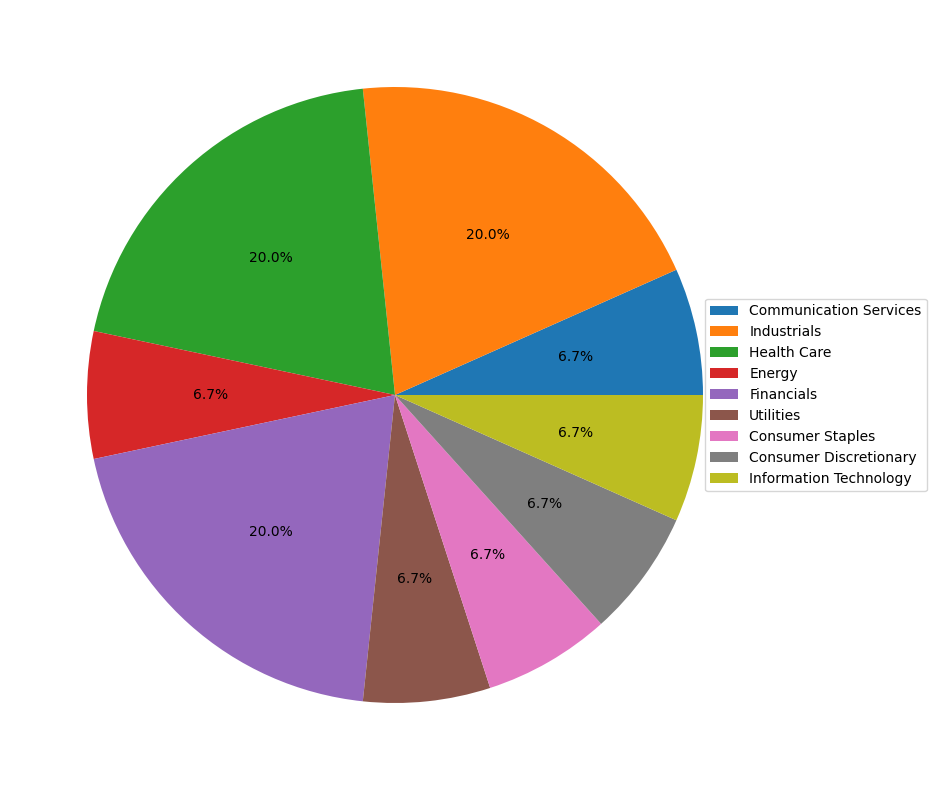

In [10]:
# plot sector pie chart
labels = []
sizes = []

for x, y in dictSector.items():
    labels.append(x)
    sizes.append(y)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%')
ax.legend(labels=labels, bbox_to_anchor=(1.2, 0.5), loc='right')

